# Load trained models and generated trajectories from Wandb
You will need to: 
1. Enroll in Wandb project `foundational_ssm_nlb`
2. Check runs in the project for all trained models. 
3. Download the original dataset from huggingface `https://huggingface.co/datasets/MelinaLaimon/nlb_processed/tree/main`, 

In [16]:
import wandb 
import os
import h5py
import tempfile

def h5_to_dict(h5obj):
    """Recursive function that reads HDF5 file to dict

    Parameters
    ----------
    h5obj : h5py.File or h5py.Group
        File or group object to load into a dict
    
    Returns
    -------
    dict of np.array
        Dict mapping h5obj keys to arrays
        or other dicts
    """
    data_dict = {}
    for key in h5obj.keys():
        if isinstance(h5obj[key], h5py.Group):
            data_dict[key] = h5_to_dict(h5obj[key])
        else:
            data_dict[key] = h5obj[key][()]
    return data_dict


def load_artifact_with_tempdir(artifact_name, artifact_type='predictions_and_activations'):
    """Load a wandb artifact using a temporary directory and convert to dict
    
    Parameters
    ----------
    artifact_name : str
        Full artifact name (e.g., 'melinajingting-ucl/foundational_ssm_pretrain_decoding/possm_dataset_l1_d64_predictions_and_activations_epoch_300:v0')
    artifact_type : str
        Type of artifact to load
    
    Returns
    -------
    dict
        Dictionary containing the artifact data
    """
    if wandb.run is None:
        wandb.init()
    
    artifact = wandb.run.use_artifact(artifact_name, type=artifact_type)
    
    with tempfile.TemporaryDirectory() as temp_dir:
        artifact_dir = artifact.download(temp_dir)
        
        h5_files = [f for f in os.listdir(temp_dir) if f.endswith('.h5')]
        if not h5_files:
            print(f"Available files in {temp_dir}: {os.listdir(temp_dir)}")
            raise FileNotFoundError(f"No H5 file found in {temp_dir}. Available files: {os.listdir(temp_dir)}")
        
        h5_path = os.path.join(temp_dir, h5_files[0])
        
        with h5py.File(h5_path, 'r') as h5obj:
            data_dict = h5_to_dict(h5obj)
        
        return data_dict
    
    
artifact = load_artifact_with_tempdir('melinajingting-ucl/foundational_ssm_pretrain_decoding/possm_dataset_l1_d64_predictions_and_activations_epoch_300:v0')
artifact['sessions']['odoherty_sabes_nonhuman_2017']['indy_20170131_02']

wandb: Downloading large artifact possm_dataset_l1_d64_predictions_and_activations_epoch_300:v0, 122.47MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5 (260.7MB/s)


{'activations': {'ssm_block_0': array([[[ 2.9849000e+00,  1.0608538e+00,  3.1148047e+00, ...,
           -4.2435775e+00,  2.0726562e-01,  3.2290108e+00],
          [ 2.6243296e+00,  1.9076905e+00,  2.7774172e+00, ...,
           -4.9131122e-01, -1.4756736e-01,  3.2675059e+00],
          [ 2.6626797e+00,  1.7032995e+00,  3.3676558e+00, ...,
           -4.5642042e+00, -3.3848006e-01,  3.2682309e+00],
          ...,
          [ 1.8999099e+00,  1.1582923e-01,  2.0778532e+00, ...,
           -7.0529957e+00, -5.2345619e+00,  3.9227152e-01],
          [ 2.3760288e+00, -4.3652310e+00,  2.8286748e+00, ...,
           -1.0804053e+01, -5.3279734e+00,  1.7356873e-04],
          [ 2.3334963e+00,  2.3827996e+00,  3.2371264e+00, ...,
           -9.5565434e+00, -4.8403940e+00,  5.3628302e-01]],
  
         [[ 2.6794775e+00,  5.9677136e-01,  2.5868850e+00, ...,
           -4.5272894e+00, -3.6750764e-01,  2.9696128e+00],
          [ 1.5633128e+00,  1.3463327e+00,  1.2137501e+00, ...,
           -3.64537

wandb:   1 of 1 files downloaded.  


Loading checkpoint from: /tmp/tmpq4abel_6/tmpe9qkrek7.ckpt


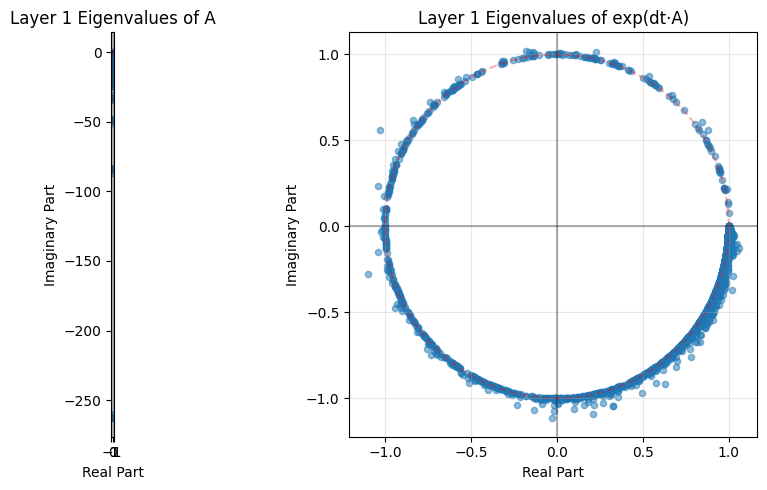

IndexError: list index out of range